In [4]:
# PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')
#file_path = "/content/drive/MyDrive/SMT/Semester1/Stat. & DS/DS Project/Data/Income/median net EU income2.xlsx"
file_path = "/content/drive/MyDrive/SMT/Semester1/Stat. & DS/DS Project/Data/Income/median net EU income2.xlsx" # Ensure the path is pointing to the correct Excel file, not a directory
income= pd.read_excel(file_path)
income= pd.read_excel(file_path, na_values=["NaN"])
income.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belgium,21705.0,21654.0,22295.0,22733.0,23686,24608.0,25672.0,25855.0,27314.0,28997.0
1,Bulgaria,3311.0,3332.0,3151.0,3590.0,3590,4224.0,4612.0,5157.0,5378.0,6523.0
2,Czechia,7622.0,7423.0,7838.0,8282.0,9088,9995.0,10627.0,10625.0,12146.0,13656.0
3,Denmark,27861.0,28364.0,28665.0,29383.0,30104,30717.0,30681.0,32088.0,33260.0,33903.0
4,Germany,19733.0,20668.0,21275.0,21920.0,22713,23515.0,26008.0,24946.0,24925.0,26274.0
5,Estonia,7217.0,7889.0,8645.0,9384.0,10524,11461.0,12228.0,12623.0,14827.0,15128.0
6,Ireland,20171.0,21629.0,22544.0,22879.0,24920,25422.0,26766.0,28762.0,30063.0,30689.0
7,Greece,7680.0,7520.0,7500.0,7600.0,7863,8195.0,8781.0,8752.0,9520.0,10050.0
8,Spain,13269.0,13352.0,13681.0,14203.0,14785,15015.0,16043.0,15892.0,16814.0,18316.0
9,France,21199.0,21415.0,21713.0,21960.0,22220,22562.0,22143.0,22732.0,23053.0,24179.0


In [23]:
income2 = income.rename(columns={"Unnamed: 0": "Country"})
income2

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Belgium,21705.0,21654.0,22295.0,22733.0,23686,24608.0,25672.0,25855.0,27314.0,28997.0
1,Bulgaria,3311.0,3332.0,3151.0,3590.0,3590,4224.0,4612.0,5157.0,5378.0,6523.0
2,Czechia,7622.0,7423.0,7838.0,8282.0,9088,9995.0,10627.0,10625.0,12146.0,13656.0
3,Denmark,27861.0,28364.0,28665.0,29383.0,30104,30717.0,30681.0,32088.0,33260.0,33903.0
4,Germany,19733.0,20668.0,21275.0,21920.0,22713,23515.0,26008.0,24946.0,24925.0,26274.0
5,Estonia,7217.0,7889.0,8645.0,9384.0,10524,11461.0,12228.0,12623.0,14827.0,15128.0
6,Ireland,20171.0,21629.0,22544.0,22879.0,24920,25422.0,26766.0,28762.0,30063.0,30689.0
7,Greece,7680.0,7520.0,7500.0,7600.0,7863,8195.0,8781.0,8752.0,9520.0,10050.0
8,Spain,13269.0,13352.0,13681.0,14203.0,14785,15015.0,16043.0,15892.0,16814.0,18316.0
9,France,21199.0,21415.0,21713.0,21960.0,22220,22562.0,22143.0,22732.0,23053.0,24179.0


In [7]:
income2.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,35.000000,35.000000,35.000000,36.000000,37.000000,35.000000,34.000000,33.000000,32.000000,30.000000
mean,14593.771429,14847.257143,15234.314286,15395.944444,15591.783784,16145.857143,16258.205882,17084.606061,18472.281250,20603.700000
std,11001.636988,11017.620092,11209.126643,11550.995452,11827.698642,11605.290523,11443.021904,11664.864141,11962.918603,12301.628026
min,1946.000000,2119.000000,2233.000000,1760.000000,1997.000000,2231.000000,2523.000000,2583.000000,2804.000000,2957.000000
25%,5229.500000,5541.000000,5835.000000,6086.750000,6574.000000,7159.000000,7833.000000,8297.000000,8914.250000,10352.000000
50%,12808.000000,13352.000000,13617.000000,13458.000000,13244.000000,14067.000000,13501.000000,15415.000000,16679.000000,18594.500000
75%,21452.000000,21641.500000,22638.500000,23049.500000,24016.000000,24610.000000,25626.500000,25498.000000,26882.000000,28584.250000
max,43775.000000,41483.000000,44253.000000,43741.000000,43013.000000,41259.000000,43051.000000,44753.000000,45405.000000,49524.000000


Data cleaning

In [73]:
#data cleaning
rows_with_nan = [index for index, row in income2.iterrows() if row.isna().any()]
#print(rows_with_nan) #identifying rows with nan

#Delete countries with too many nan values (<=3)
nan_count_per_row = income2.isna().sum(axis=1)# Calculate the number of NaN values in each row
rows_to_drop = nan_count_per_row[nan_count_per_row >= 3].index # Get the indices of rows with 3 or more NaNs
income_clean = income2.drop(rows_to_drop) # Drop the rows and update the DataFrame

#Mean for missing values

year_columns = income_clean.columns[income_clean.columns.get_loc('2014'):] # Get a list of columns representing years (starting from '2014')

for col in year_columns: # Convert year columns to numeric before interpolation
    # Attempt to convert to numeric, coercing errors to NaN
    income_clean[col] = pd.to_numeric(income_clean[col], errors='coerce')

income_clean[year_columns] = income_clean[year_columns].interpolate(method='linear', axis=1, limit_direction='both')



# Get the list of columns to drop (years <= 2014 and  > 2022)
#columns_to_drop = [col for col in income2.columns if isinstance(col, (int, float)) and (col <= 2014 or col == 2023)]
#income_clean = income2.drop(columns=columns_to_drop)
income_clean= income_clean.drop(columns=["2023"])
income_clean

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,21705.0,21654.0,22295.0,22733.0,23686.0,24608.0,25672.0,25855.0,27314.0
1,Bulgaria,3311.0,3332.0,3151.0,3590.0,3590.0,4224.0,4612.0,5157.0,5378.0
2,Czechia,7622.0,7423.0,7838.0,8282.0,9088.0,9995.0,10627.0,10625.0,12146.0
3,Denmark,27861.0,28364.0,28665.0,29383.0,30104.0,30717.0,30681.0,32088.0,33260.0
4,Germany,19733.0,20668.0,21275.0,21920.0,22713.0,23515.0,26008.0,24946.0,24925.0
5,Estonia,7217.0,7889.0,8645.0,9384.0,10524.0,11461.0,12228.0,12623.0,14827.0
6,Ireland,20171.0,21629.0,22544.0,22879.0,24920.0,25422.0,26766.0,28762.0,30063.0
7,Greece,7680.0,7520.0,7500.0,7600.0,7863.0,8195.0,8781.0,8752.0,9520.0
8,Spain,13269.0,13352.0,13681.0,14203.0,14785.0,15015.0,16043.0,15892.0,16814.0
9,France,21199.0,21415.0,21713.0,21960.0,22220.0,22562.0,22143.0,22732.0,23053.0


In [103]:
# Calculate the average and add a new column
income_clean['Average'] = income_clean[columns_to_average].mean(axis=1)
income_clean.head(2)

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,Average
0,Belgium,21705.0,21654.0,22295.0,22733.0,23686.0,24608.0,25672.0,25855.0,27314.0,24134.4
1,Bulgaria,3311.0,3332.0,3151.0,3590.0,3590.0,4224.0,4612.0,5157.0,5378.0,4008.4


In [10]:
#génerer un nouveau csv
#output_file_path = "/content/drive/MyDrive/SMT/Semester1/Stat. & DS/DS Project/Data/modified_income.csv"
#income.to_csv(output_file_path, index=False)

#print(f"Modified data saved to: {output_file_path}")

Merge data

In [11]:
import requests
import pandas as pd
import io

# Remplacez par l'URL brute du fichier dans votre dépôt GitHub
url = "https://github.com/gaojing33/Stat-Data-Science/raw/main/waste_per_capita.csv"

# Téléchargez le fichier avec requests
response = requests.get(url)
response.raise_for_status()  # Vérifiez si la requête a réussi

euwaste = pd.read_csv(io.StringIO(response.content.decode('utf-8')))  # Read as CSV using StringIO
euwaste

,Country,2004,2006,2008,2012,2014,2016,2018,2020,2022
0,Belgium,0.512215,0.451431,0.418039,0.478042,0.484672,0.445686,0.428573,0.463651,0.413803
1,Bulgaria,0.340031,0.383909,0.386688,0.375930,0.376963,0.409341,0.465519,0.351965,0.389528
2,Czechia,0.278699,0.340587,0.307072,0.307711,0.310165,0.339176,0.547108,0.571200,0.409919
3,Denmark,0.373535,0.381327,0.459140,0.597256,0.636289,0.609804,0.608520,0.621343,0.554927
4,Germany,0.460524,0.420025,0.434881,0.454037,0.456714,0.455243,0.450632,0.462613,0.436443
5,Estonia,0.294228,0.304755,0.328721,0.329320,0.366497,0.326672,0.415608,0.414102,0.436438
6,Ireland,0.422539,0.470209,0.376273,0.360986,0.328677,0.320240,0.327699,0.387372,0.356990
7,Greece,0.385084,0.375534,0.357518,NaN,NaN,0.444089,0.428946,0.421654,0.381985
8,Spain,0.573712,0.547110,0.534966,0.453335,0.433581,0.467255,0.486638,0.475703,0.499114
9,France,0.412390,0.424361,0.457925,0.455063,0.428835,0.436024,0.444378,0.497135,0.510826


In [92]:
#data cleaning
rows_with_nan = [index for index, row in euwaste.iterrows() if row.isna().any()]
#print(rows_with_nan) #identifying rows with nan

#Delete countries with too many nan values (<=3)
nan_count_per_row = euwaste.isna().sum(axis=1)# Calculate the number of NaN values in each row
rows_to_drop = nan_count_per_row[nan_count_per_row >= 1].index # Get the indices of rows with 1 or more NaNs
euwaste_clean = euwaste.drop(rows_to_drop) # Drop the rows and update the DataFrame


# Get the list colums to drop (years <2014)
year_columns = euwaste_clean.columns[euwaste_clean.columns.get_loc('2014'):]
columns_to_drop = [col for col in euwaste_clean.columns if col != 'Country' and col not in year_columns]
euwaste_clean = euwaste_clean.drop(columns=columns_to_drop)

euwaste_clean

,Country,2014,2016,2018,2020,2022,Average
0,Belgium,0.484672,0.445686,0.428573,0.463651,0.413803,0.447277
1,Bulgaria,0.376963,0.409341,0.465519,0.351965,0.389528,0.398663
2,Czechia,0.310165,0.339176,0.547108,0.571200,0.409919,0.435513
3,Denmark,0.636289,0.609804,0.608520,0.621343,0.554927,0.606177
4,Germany,0.456714,0.455243,0.450632,0.462613,0.436443,0.452329
5,Estonia,0.366497,0.326672,0.415608,0.414102,0.436438,0.391863
6,Ireland,0.328677,0.320240,0.327699,0.387372,0.356990,0.344196
8,Spain,0.433581,0.467255,0.486638,0.475703,0.499114,0.472458
9,France,0.428835,0.436024,0.444378,0.497135,0.510826,0.463440
11,Italy,0.491363,0.500578,0.503160,0.485318,0.492228,0.494529


In [102]:
# Calculate the average and add a new column
euwaste_clean['Average'] = euwaste_clean[columns_to_average].mean(axis=1)
euwaste_clean.head(2)

,Country,2014,2016,2018,2020,2022,Average
0,Belgium,0.484672,0.445686,0.428573,0.463651,0.413803,0.447277
1,Bulgaria,0.376963,0.409341,0.465519,0.351965,0.389528,0.398663


In [105]:
import matplotlib.pyplot as plt
import pandas as pd

#'income_clean' and 'euwaste_clean' are the dataframes

# 1. Merge dataframes based on common countries
merged_df = pd.merge(income_clean, euwaste_clean, on='Country', how='inner')

# 2. Find common columns, considering potential renaming after merge
# Get suffixes used for renaming (e.g., '_x', '_y')
suffixes = ('_x', '_y')
# Extract common columns while ignoring suffixes
common_columns = [col for col in merged_df.columns
                  if any(col.endswith(suffix) or col in euwaste_clean.columns and col in income_clean.columns
                         for suffix in suffixes)]

# 3. Keep only common columns in merged_df
merged_df = merged_df[[c for c in common_columns if c in merged_df.columns]]  # Use list comprehension for filtering
merged_df

,Country,2014_x,2016_x,2018_x,2020_x,2022_x,Average_x,2014_y,2016_y,2018_y,2020_y,2022_y,Average_y
0,Belgium,21705.0,22295.0,23686.0,25672.0,27314.0,24134.4,0.484672,0.445686,0.428573,0.463651,0.413803,0.447277
1,Bulgaria,3311.0,3151.0,3590.0,4612.0,5378.0,4008.4,0.376963,0.409341,0.465519,0.351965,0.389528,0.398663
2,Czechia,7622.0,7838.0,9088.0,10627.0,12146.0,9464.2,0.310165,0.339176,0.547108,0.571200,0.409919,0.435513
3,Denmark,27861.0,28665.0,30104.0,30681.0,33260.0,30114.2,0.636289,0.609804,0.608520,0.621343,0.554927,0.606177
4,Germany,19733.0,21275.0,22713.0,26008.0,24925.0,22930.8,0.456714,0.455243,0.450632,0.462613,0.436443,0.452329
5,Estonia,7217.0,8645.0,10524.0,12228.0,14827.0,10688.2,0.366497,0.326672,0.415608,0.414102,0.436438,0.391863
6,Ireland,20171.0,22544.0,24920.0,26766.0,30063.0,24892.8,0.328677,0.320240,0.327699,0.387372,0.356990,0.344196
7,Spain,13269.0,13681.0,14785.0,16043.0,16814.0,14918.4,0.433581,0.467255,0.486638,0.475703,0.499114,0.472458
8,France,21199.0,21713.0,22220.0,22143.0,23053.0,22065.6,0.428835,0.436024,0.444378,0.497135,0.510826,0.463440
9,Italy,15759.0,16247.0,16844.0,18067.0,18592.0,17101.8,0.491363,0.500578,0.503160,0.485318,0.492228,0.494529


Create scatter plot

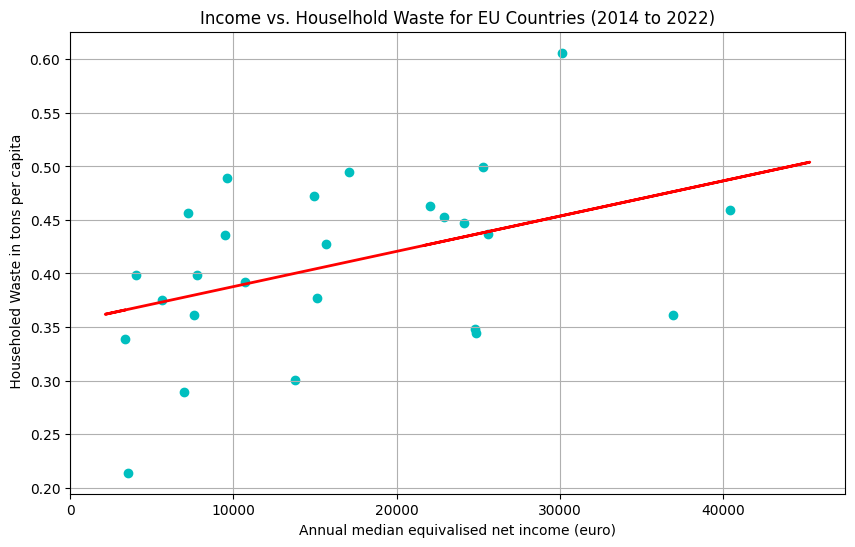

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Get year columns from income2 and euwaste
income_years = income_clean.columns[1:]  # Assuming income columns start from index 1
waste_years = euwaste_clean.columns[1:]  # Assuming waste columns start from index 1

# 2. Define markers and colors for each country
markers = ['o'] # 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '1', '2', '3', '4', '8', 'P', ',', '.', '>', 's', '<', 'd', '^', 'v','o', '+', 'x', '8', 's', 'p', '*', 'h', 'H', 'D']

colors = ['c'] # 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'lime', 'navy','lightcoral', 'gold', 'indigo', 'darkgreen', 'darkred', 'teal', 'salmon', 'darkblue', 'firebrick', 'darkviolet', 'goldenrod', 'forestgreen', 'dodgerblue', 'crimson', 'deeppink', 'darkorange', 'darkslategray', 'cadetblue', 'sienna', 'mediumseagreen', 'darkorchid']

unique_countries = merged_df['Country'].unique() #Gets the unique country values from the 'Country' column in merged_df
# 3. Create scatter plot for each country
plt.figure(figsize=(10, 6))

for country in unique_countries:
    # Get average income and waste values for the country
    income_val = merged_df.loc[merged_df['Country'] == country, 'Average_x'].values[0]
    waste_val = merged_df.loc[merged_df['Country'] == country, 'Average_y'].values[0]

    # Plot the data for the country with specific marker and color
    plt.scatter(income_val, waste_val, label=country, marker=markers[0], color=colors[0])

# Linear Regression on Scatter Plot Data
# Extract all income and waste values used in the scatter plot
all_income_values = []
all_waste_values = []
for country in unique_countries:
    income_values = []
    waste_values = []
    for year in income_years:
        if year in waste_years:  # Ensure data is available for both income and waste for the year
            try:
                income_val = merged_df.loc[merged_df['Country'] == country, year + '_x'].values[0]
                waste_val = merged_df.loc[merged_df['Country'] == country, year].values[0] if year in merged_df.columns else merged_df.loc[merged_df['Country'] == country, year + '_y'].values[0]
                income_values.append(income_val)
                waste_values.append(waste_val)
            except IndexError:
                pass
    all_income_values.extend(income_values)  # Add to the overall list
    all_waste_values.extend(waste_values)

# Remove NaN values before regression
mask = ~np.isnan(all_income_values) & ~np.isnan(all_waste_values)
all_income_values_cleaned = np.array(all_income_values)[mask]
all_waste_values_cleaned = np.array(all_waste_values)[mask]

# Perform linear regression
X = all_income_values_cleaned.reshape(-1, 1)
y = all_waste_values_cleaned
reg = LinearRegression().fit(X, y)

# Plot regression line on the existing scatter plot
plt.plot(X, reg.predict(X), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Annual median equivalised net income (euro)')
plt.ylabel(' Householed Waste in tons per capita')
plt.title('Income vs. Houselhold Waste for EU Countries (2014 to 2022)')
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.show()

Regression

In [107]:
# Get regression metrics
coefficient = reg.coef_[0]  # Coefficient of regression (slope)
intercept = reg.intercept_  # Intercept
y_pred = reg.predict(X)  # Predicted values
mse = mean_squared_error(y, y_pred)  # Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared

# Print regression metrics
print("Coefficient of Regression (slope):", coefficient)
print("Intercept:", intercept)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Coefficient of Regression (slope): 3.2920431990683853e-06
Intercept: 0.3547941404771311
Mean Squared Error (MSE): 0.00668048600545488
R-squared (R2): 0.1474889907713779
